In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def display_img(img):
    new_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(new_img)
    plt.show()

def displayImages(img1,img2):
    fig= plt.figure(figsize=(10,20))
    fig.add_subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray')
    plt.axis('off')
    plt.title("First")
    
    fig.add_subplot(1, 2, 2)
    plt.imshow(img2, cmap='gray')
    plt.axis('off')
    plt.title("Second")
    plt.show()


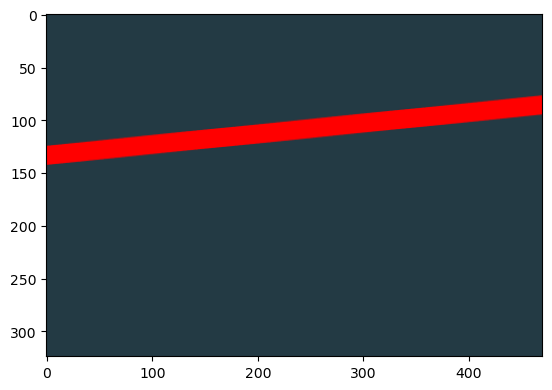

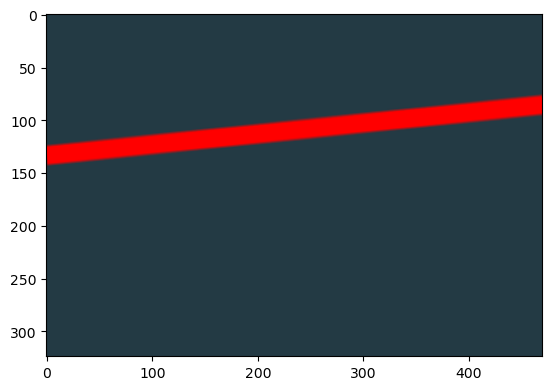

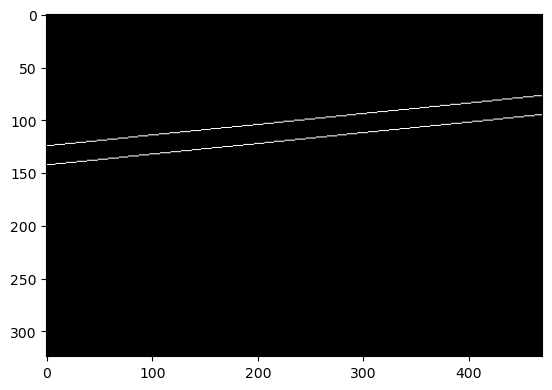

In [8]:
img = cv.imread('./task-assets/Screenshot 2023-09-03 143429.png')
display_img(img)
filtered = cv.GaussianBlur(img, (3,3), 100)
display_img(filtered)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
canny = cv.Canny(img, 10, 100)
display_img(canny)
